## Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Perceptron

O perceptron é uma rede neural cujos os pesos e inclinações podem ser treinados para produzir um vetor alvo que quando apresentamos tem que corresponder ao vetor de entrada.

Levando em consideração o Perceptron mostrado em sala de aula, realizamos o treinamento do Perceptron e plotamos os dados para cada um dos datasets, que possuíam amostras de treinamento para problemas de classificação binária com X = R² e Y = {−1, 1}.

Os dados estão na forma de um arquivo de texto com três colunas:

 - Coluna 1:  Atributo numérico 1 (x1);
 - Coluna 2:  Atributo numérico 2 (x2);
 - Coluna 3:  Classe (y).


## Classe Perceptron

Temos aqui a classe perceptron que possui duas funções:

 - fit: É a função de treinamento do perceptron que criada baseada na função mostrada em sala de aula.

![enter image description here](https://raw.githubusercontent.com/tobiasaires/RNA/dev/ex01/images/algoritmo_perceptron.jpeg?token=AJFBSNFHNGHXLP3DQR7EVNS7377QQ)
 
  - predict: É a função que eliminando a terceira coluna(Predição)


In [ ]:
class Perceptron:
    def __init__(self, W):
        self.w = W  

    def predict(self, x):
        return 1.0 if np.dot(self.w.T, x) >= lse -1.0

    def fit(self, X, y):
        for epoch in range(50):
            y_calc = []
            for n in range(len(X)):
                y_hat = self.predict(X[n])
                if y_hat != y[n]:
                    self.w = self.w + np.multiply(y[n], X[n])
        return self.w

### Função Plotagem

Pega-se o menor e o maior valor do eixo x, depois o menor e o maior valor do eixo y. Logo em sequida se cria pontos apartir 0.01 até o máximo. Depois joga-se os pontos na função predict onde fica o Z. E ele que vai dizer a qual classe pertence (1 e -1), dependendo do valor ele pinta os pontos com as cores definidas.

In [19]:
def plot(x1, x2, clf, title):
    plot_step = 0.01

    x_min, x_max = x1.min() - 0.2, x1.max() + 0.2
    y_min, y_max = x2.min() - 0.2, x2.max() + 0.2

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))

    data = np.c_[xx.ravel(), yy.ravel()]

    bias_col = np.ones(data.shape[0])

    data = np.insert(data, 0, bias_col, axis=1)

    Z = np.array([clf.predict(x) for x in data])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    data = {'x1': x1, 'x2': x2}
    plt.title(title)
    plt.scatter('x1', 'x2', c=y, data=data)
    plt.xlabel('entry x1')
    plt.ylabel('entry x2')
    plt.show()

## Plotagem da superfície de decisão (Data XOR)

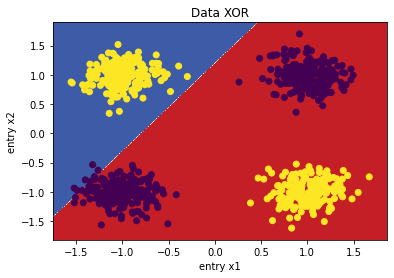

In [20]:
dataframe = pd.read_csv('data_xor.dat', delimiter="\s+", header=None, engine='python')
x1 = dataframe[0]
x2 = dataframe[1]
x_bias = np.ones(len(x1))
y = dataframe[2]
W = np.zeros(dataframe.shape[1])
X = [x for x in zip(x1,x2, x_bias)]

perceptron = Perceptron(W)
w_calc = perceptron.fit(X,y)

plot(x1, x2, Perceptron(w_calc), 'Data XOR')

## Plotagem da superfície de decisão (Data OR)

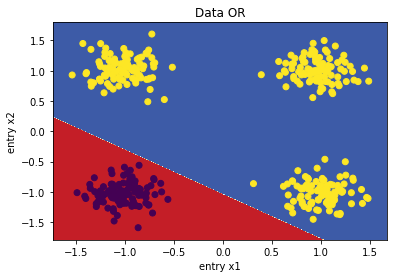

In [21]:
dataframe = pd.read_csv('data_or.dat', delimiter="\s+", header=None, engine='python')
x1 = dataframe[0]
x2 = dataframe[1]
x_bias = np.ones(len(x1))
y = dataframe[2]
W = np.zeros(dataframe.shape[1])
X = [x for x in zip(x1,x2, x_bias)]

perceptron = Perceptron(W)
w_calc = perceptron.fit(X,y)

plot(x1, x2, Perceptron(w_calc), 'Data OR')